<a href="https://colab.research.google.com/github/melodyhe21/Datathon/blob/main/Datathon_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import abline_plot

# Import Data

In [1213]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1214]:
filename = "/content/gdrive/MyDrive/Datathon 2022/track.csv"
data = pd.read_csv(filename)
data

,year,state_code,county_code,msa,census_tract,applicant_age,applicant_age_above_62,race,ethnicity,sex,income,debt_to_income_ratio,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,lei,aus,purchaser_type,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,conforming_loan_limit,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,occupancy_type,property_value,total_loan_costs,total_units,accepted,denial_reason
0,2019,TX,48201.0,26420.0,4.820142e+10,45-54,0.0,Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Male,26.0,>60%,2331.0,39.0,84.39,6949.0,86.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,99.640,C,Site-built,NaN,NaN,NaN,95000.0,Conventional,Subordinate Lien,Principal residence,155000.0,NaN,1.0,0.0,Debt-to-income ratio
1,2019,TX,48201.0,26420.0,4.820143e+10,55-64,0.0,White,Not Hispanic or Latino,Joint,379.0,>60%,1202.0,35.0,24.86,3270.0,360.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,68.617,NC,Site-built,NaN,NaN,NaN,3225000.0,Conventional,First Lien,Principal residence,4705000.0,NaN,1.0,0.0,Debt-to-income ratio
2,2019,TX,48201.0,26420.0,4.820122e+10,45-54,0.0,Asian,Hispanic or Latino,Joint,86.0,41%-<46%,1261.0,45.0,89.71,4803.0,50.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,58.330,C,Site-built,NaN,6.010,NaN,105000.0,Conventional,First Lien,Principal residence,185000.0,NaN,1.0,1.0,NaN
3,2019,TX,48201.0,26420.0,4.820152e+10,55-64,1.0,White,Hispanic or Latino,Female,25.0,36%-<41%,651.0,41.0,75.32,3991.0,66.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,18.220,C,Site-built,NaN,6.125,NaN,65000.0,Conventional,First Lien,Principal residence,375000.0,NaN,1.0,1.0,NaN
4,2019,TX,48201.0,26420.0,4.820133e+10,65-74,1.0,White,Not Hispanic or Latino,Male,33.0,20%-<30%,871.0,44.0,94.26,6028.0,52.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,30.330,C,Site-built,NaN,4.500,NaN,75000.0,Conventional,First Lien,Principal residence,235000.0,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136256,2020,TX,48201.0,26420.0,4.820131e+10,55-64,0.0,White,Not Hispanic or Latino,Male,330.0,50%-60%,384.0,17.0,50.52,3193.0,200.0,549300LBCBNR1OT00651,Loan Prospector (LP) or Loan Product Advisor,NaN,80000.0,0.0,1.0,80.000,C,Site-built,NaN,NaN,NaN,245000.0,Conventional,First Lien,Investment property,305000.0,NaN,1.0,0.0,Credit application incomplete
136257,2020,TX,48201.0,26420.0,4.820155e+10,55-64,0.0,White,Not Hispanic or Latino,Male,138.0,30%-<36%,2639.0,24.0,47.16,7452.0,144.0,549300LBCBNR1OT00651,Desktop Underwriter (DU),Freddie Mac,80000.0,0.0,0.0,61.000,C,Site-built,NaN,2.500,NaN,255000.0,Conventional,First Lien,Principal residence,415000.0,5022.77,1.0,1.0,NaN
136258,2020,TX,48201.0,26420.0,4.820132e+10,35-44,0.0,White,Hispanic or Latino,Female,106.0,>60%,2022.0,55.0,76.81,7732.0,58.0,549300LBCBNR1OT00651,NaN,NaN,80000.0,0.0,0.0,100.000,C,Site-built,NaN,NaN,NaN,135000.0,FHA,First Lien,Principal residence,135000.0,NaN,1.0,0.0,Debt-to-income ratio
136259,2020,TX,48201.0,26420.0,4.820125e+10,25-34,0.0,White,Hispanic or Latino,Male,91.0,30%-<36%,2134.0,32.0,20.22,6062.0,117.0,5493003GQDUH26DNNH17,Desktop Underwriter (DU),Freddie Mac,80000.0,0.0,0.0,95.000,C,Site-built,NaN,3.875,NaN,215000.0,Conventional,First Lien,Principal residence,225000.0,2917.68,1.0,1.0,NaN


In [1215]:
data.describe() # summarizes data

,year,county_code,msa,census_tract,applicant_age_above_62,income,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,discount_points,interest_rate,lender_credits,loan_amount,property_value,total_loan_costs,total_units,accepted
count,136261.000000,136261.0,136261.000000,1.356200e+05,136261.000000,1.352280e+05,136261.000000,136261.000000,136261.000000,136261.000000,136261.000000,136261.000000,136261.000000,136261.000000,129631.000000,41720.000000,118523.000000,40596.000000,1.362610e+05,1.340320e+05,111534.000000,136261.000000,136261.000000
mean,2019.047732,48201.0,26360.281078,4.820143e+10,0.062659,1.375823e+02,2487.064186,26.069330,55.403369,8445.243555,128.818055,77502.078364,0.018002,0.020930,89.048454,1886.057716,4.189872,992.128990,2.593925e+05,3.245714e+05,6187.532408,1.006576,0.875283
std,0.817922,0.0,1254.678890,7.496038e+05,0.242350,4.103591e+03,1399.283686,15.642692,24.010072,4686.259106,58.907042,4122.828951,0.132960,0.143152,295.850162,1987.898845,19.526297,1964.960229,2.186632e+05,3.191090e+05,5454.545409,0.118150,0.330398
min,2018.000000,48201.0,0.000000,4.820110e+10,0.000000,-6.360000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.681818,0.010000,0.000000,0.010000,5.000000e+03,5.000000e+03,0.000000,1.000000,0.000000
25%,2018.000000,48201.0,26420.000000,4.820132e+10,0.000000,5.900000e+01,1412.000000,12.000000,35.340000,4855.000000,87.000000,75600.000000,0.000000,0.000000,80.000000,575.587500,3.375000,66.400000,1.650000e+05,1.850000e+05,4057.462500,1.000000,1.000000
50%,2019.000000,48201.0,26420.000000,4.820145e+10,0.000000,8.700000e+01,2223.000000,22.000000,52.030000,7258.000000,118.000000,77100.000000,0.000000,0.000000,95.000000,1302.720000,4.125000,350.000000,2.150000e+05,2.350000e+05,5542.260000,1.000000,1.000000
75%,2020.000000,48201.0,26420.000000,4.820154e+10,0.000000,1.390000e+02,3202.000000,37.000000,76.890000,11232.000000,163.000000,80000.000000,0.000000,0.000000,96.500000,2524.835000,4.750000,1170.062500,2.950000e+05,3.450000e+05,7785.235000,1.000000,1.000000
max,2020.000000,48201.0,26420.000000,4.847368e+10,1.000000,1.496000e+06,6232.000000,76.000000,100.000000,20758.000000,360.000000,80000.000000,1.000000,1.000000,98189.000000,34800.000000,4750.000000,200157.500000,8.205000e+06,1.580500e+07,739779.000000,4.000000,1.000000


In [1216]:
data.dtypes # checks data types in the dataset

year                                int64
state_code                         object
county_code                       float64
msa                               float64
census_tract                      float64
applicant_age                      object
applicant_age_above_62            float64
race                               object
ethnicity                          object
sex                                object
income                            float64
debt_to_income_ratio               object
tract_one_to_four_family_homes    float64
tract_median_age_of_hu            float64
tract_minority_pop_percent        float64
tract_population                  float64
tract_to_msa_income_percentage    float64
lei                                object
aus                                object
purchaser_type                     object
ffiec_msa_md_median_fam_income    float64
balloon_payment                   float64
business_or_commercial_purpose    float64
combined_loan_to_value_ratio      

# Cleaning Data

In [1217]:
data.isna().sum() #determines which values in original dataset are missing

year                                   0
state_code                            41
county_code                            0
msa                                    0
census_tract                         641
applicant_age                          0
applicant_age_above_62                 0
race                                   0
ethnicity                              0
sex                                    0
income                              1033
debt_to_income_ratio                2789
tract_one_to_four_family_homes         0
tract_median_age_of_hu                 0
tract_minority_pop_percent             0
tract_population                       0
tract_to_msa_income_percentage         0
lei                                    0
aus                                17808
purchaser_type                     41343
ffiec_msa_md_median_fam_income         0
balloon_payment                        0
business_or_commercial_purpose         0
combined_loan_to_value_ratio        6630
conforming_loan_

In [1218]:
data_drop = data.drop(['year', 'state_code', 'county_code', 'msa', 'census_tract', 'lei', 'aus', 'purchaser_type', 'total_units',
                      'denial_reason', 'applicant_age_above_62', 'tract_one_to_four_family_homes', 'tract_median_age_of_hu', 
                      'tract_minority_pop_percent', 'tract_population', 'tract_to_msa_income_percentage', 'ffiec_msa_md_median_fam_income'], axis = 1)


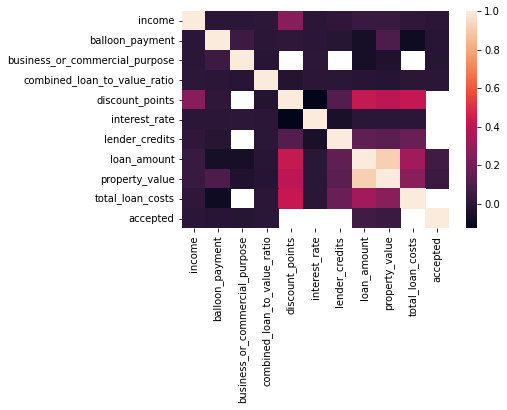

In [1219]:
data_drop_corr = data_drop.corr()
sns.heatmap(data_drop_corr)

In [1220]:
data_drop.isna().sum() #determines which values in cleaned dataset are missing

applicant_age                         0
race                                  0
ethnicity                             0
sex                                   0
income                             1033
debt_to_income_ratio               2789
balloon_payment                       0
business_or_commercial_purpose        0
combined_loan_to_value_ratio       6630
conforming_loan_limit                 0
construction_method                   0
discount_points                   94541
interest_rate                     17738
lender_credits                    95665
loan_amount                           0
loan_type                             0
lien_status                           0
occupancy_type                        0
property_value                     2229
total_loan_costs                  24727
accepted                              0
dtype: int64

In [1221]:
data_drop.dropna(inplace=True)
data_drop = data_drop[data_drop.ethnicity != 'Free Form Text Only']

# Ordinal Encoding

Loan Type

In [1222]:
#Redefines categorical variable loan_type: insured loans = 1, conventional (uninsured) loans = 0
data_drop['loan_type'] = data_drop['loan_type'].replace({'FHA':1, 'VA': 1, 'RHS/FSA':1, 'Conventional':0})

Debt-To-Income Ratio

In [1223]:
data_drop['debt_to_income_ratio'].unique()

array(['41%-<46%', '36%-<41%', '20%-<30%', '46%-<50%', '50%-60%',
       '30%-<36%', '<20%', '>60%'], dtype=object)

In [1224]:
debt_income_ratio_sort = ['>60%', '50%-60%', '46%-<50%', '41%-<46%', '36%-<41%', '30%-<36%', '20%-<30%','<20%']
debt_income_ratio_enc = OrdinalEncoder(categories = [debt_income_ratio_sort])

In [1225]:
data_drop['debt_to_income_ratio'] =  debt_income_ratio_enc.fit_transform(data_drop['debt_to_income_ratio'].values.reshape(-1, 1))

In [1226]:
data_drop['debt_to_income_ratio'].value_counts()

3.0    2258
4.0    2089
5.0    1866
6.0    1786
2.0    1645
1.0    1274
7.0     439
0.0      58
Name: debt_to_income_ratio, dtype: int64

Applicant Age

In [1227]:
data_drop['applicant_age'].unique()

array(['25-34', '45-54', '<25', '35-44', '>74', '65-74', '55-64'],
      dtype=object)

In [1228]:
age_sort = ['<25', '45-54', '55-64', '65-74', '25-34', '35-44', '>74']
age_enc = OrdinalEncoder(categories = [age_sort])

In [1229]:
data_drop['applicant_age'] =  age_enc.fit_transform(data_drop['applicant_age'].values.reshape(-1, 1))

In [1230]:
data_drop['applicant_age'].value_counts()

4.0    4018
5.0    3483
1.0    1942
2.0    1056
0.0     457
3.0     383
6.0      76
Name: applicant_age, dtype: int64

Binary Encoding

In [1231]:
def encode_binary_variable(df, col, val_pos, val_neg):
    df[col] = df[col].replace({val_pos:1, val_neg:0})

In [1232]:
encode_binary_variable(data_drop, "conforming_loan_limit", "C", "NC")
encode_binary_variable(data_drop, "construction_method", "Site-built", "Manufactured")
encode_binary_variable(data_drop, "lien_status", "Subordinate Lien", "First Lien")

One-Hot Encoding

In [1233]:
dummies = pd.get_dummies(data_drop, columns = ['race', 'ethnicity', 'sex', 'occupancy_type'])
data_drop = pd.concat([data_drop, dummies], axis=1)
data_drop.drop(labels=['race', 'ethnicity', 'sex', 'occupancy_type'], axis=1, inplace=True)

In [1234]:
data_drop.head()

,applicant_age,income,debt_to_income_ratio,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,conforming_loan_limit,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,property_value,total_loan_costs,accepted,applicant_age,income,debt_to_income_ratio,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,conforming_loan_limit,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,property_value,total_loan_costs,accepted,race_2 or more minority races,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Free Form Text Only,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_White,ethnicity_Hispanic or Latino,ethnicity_Joint,ethnicity_Not Hispanic or Latino,sex_Female,sex_Joint,sex_Male,occupancy_type_Investment property,occupancy_type_Principal residence,occupancy_type_Second residence
32,4.0,75.0,3.0,0.0,0.0,95.0,1,1,1290.75,3.500,430.00,345000.0,0,0,365000.0,5714.12,1.0,4.0,75.0,3.0,0.0,0.0,95.0,1,1,1290.75,3.500,430.00,345000.0,0,0,365000.0,5714.12,1.0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
86,1.0,129.0,4.0,0.0,0.0,96.5,1,1,2984.93,4.625,921.23,295000.0,1,0,305000.0,16432.08,1.0,1.0,129.0,4.0,0.0,0.0,96.5,1,1,2984.93,4.625,921.23,295000.0,1,0,305000.0,16432.08,1.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
107,0.0,101.0,4.0,0.0,0.0,95.0,1,1,4390.12,4.500,5740.92,275000.0,0,0,285000.0,17946.21,1.0,0.0,101.0,4.0,0.0,0.0,95.0,1,1,4390.12,4.500,5740.92,275000.0,0,0,285000.0,17946.21,1.0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
116,4.0,120.0,6.0,0.0,0.0,97.0,1,1,1072.53,3.875,729.90,285000.0,0,0,295000.0,9332.48,1.0,4.0,120.0,6.0,0.0,0.0,97.0,1,1,1072.53,3.875,729.90,285000.0,0,0,295000.0,9332.48,1.0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
129,5.0,113.0,4.0,0.0,0.0,96.5,1,1,1980.95,4.125,25.00,265000.0,1,0,265000.0,13877.24,1.0,5.0,113.0,4.0,0.0,0.0,96.5,1,1,1980.95,4.125,25.00,265000.0,1,0,265000.0,13877.24,1.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


# Training and Testing Datasets


In [1235]:
X = data_drop.drop(labels = ['interest_rate'], axis = 1)
y = data_drop['interest_rate']

In [1236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Linear Regression Model

In [1240]:
#X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
print(model.summary())

ValueError: ignored

Accuracy of Model
